# Task# 4

In [1]:
import pandas as pd

# Load the hourly data

df_hourly = pd.read_csv("E:\\Internship\\Week 6\\archive\\hour.csv")

# Display the first few rows of the dataset
print(df_hourly.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [3]:
from sklearn.preprocessing import StandardScaler

# Convert the 'dteday' column to a datetime object
df_hourly['datetime'] = pd.to_datetime(df_hourly['dteday']) + pd.to_timedelta(df_hourly['hr'], unit='h')

# Feature selection for clustering 
features = df_hourly[['hr', 'weekday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt']]

# Standardize the features for clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Display the first few rows of the scaled features
print(features_scaled[:5])


[[-1.67000398  1.49389084 -1.46689994 -1.33464759  0.9473725  -1.55388851
  -0.95633924]
 [-1.52537422  1.49389084 -1.46689994 -1.4385164   0.89553869 -1.55388851
  -0.82402209]
 [-1.38074446  1.49389084 -1.46689994 -1.4385164   0.89553869 -1.55388851
  -0.8681278 ]
 [-1.23611469  1.49389084 -1.46689994 -1.33464759  0.63636966 -1.55388851
  -0.97287888]
 [-1.09148493  1.49389084 -1.46689994 -1.33464759  0.63636966 -1.55388851
  -1.03903746]]


#### Segmentaion With K-Means Clustering

In [6]:
from sklearn.cluster import KMeans
import numpy as np

# Define the number of clusters 
kmeans = KMeans(n_clusters=4, random_state=42)
df_hourly['cluster'] = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the original dataframe
df_hourly['cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
print(df_hourly.head())

# Calculate the average values for each cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)
print(cluster_centers)


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

             datetime  cluster  
0 2011-01-01 00:00:00        1  
1 2011-01-01 01:00:00     

#### Visualization of Clustering

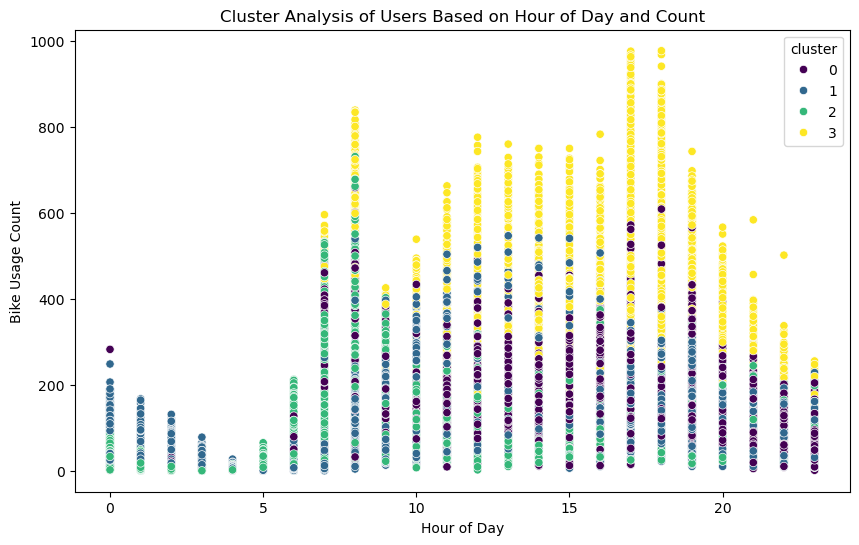

NameError: name 'cluster_analysis' is not defined

<Figure size 1400x700 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of clusters based on two main features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hr', y='cnt', hue='cluster', data=df_hourly, palette='viridis')
plt.title('Cluster Analysis of Users Based on Hour of Day and Count')
plt.xlabel('Hour of Day')
plt.ylabel('Bike Usage Count')
plt.show()

# Plotting the average usage patterns for each cluster
plt.figure(figsize=(14, 7))
for i in range(kmeans.n_clusters):
    plt.plot(cluster_analysis.columns, cluster_analysis.iloc[i], label=f'Cluster {i}')
plt.title('Average Usage Patterns for Each Cluster')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.legend()
plt.show()
